# Phase2Pro - Iteration 

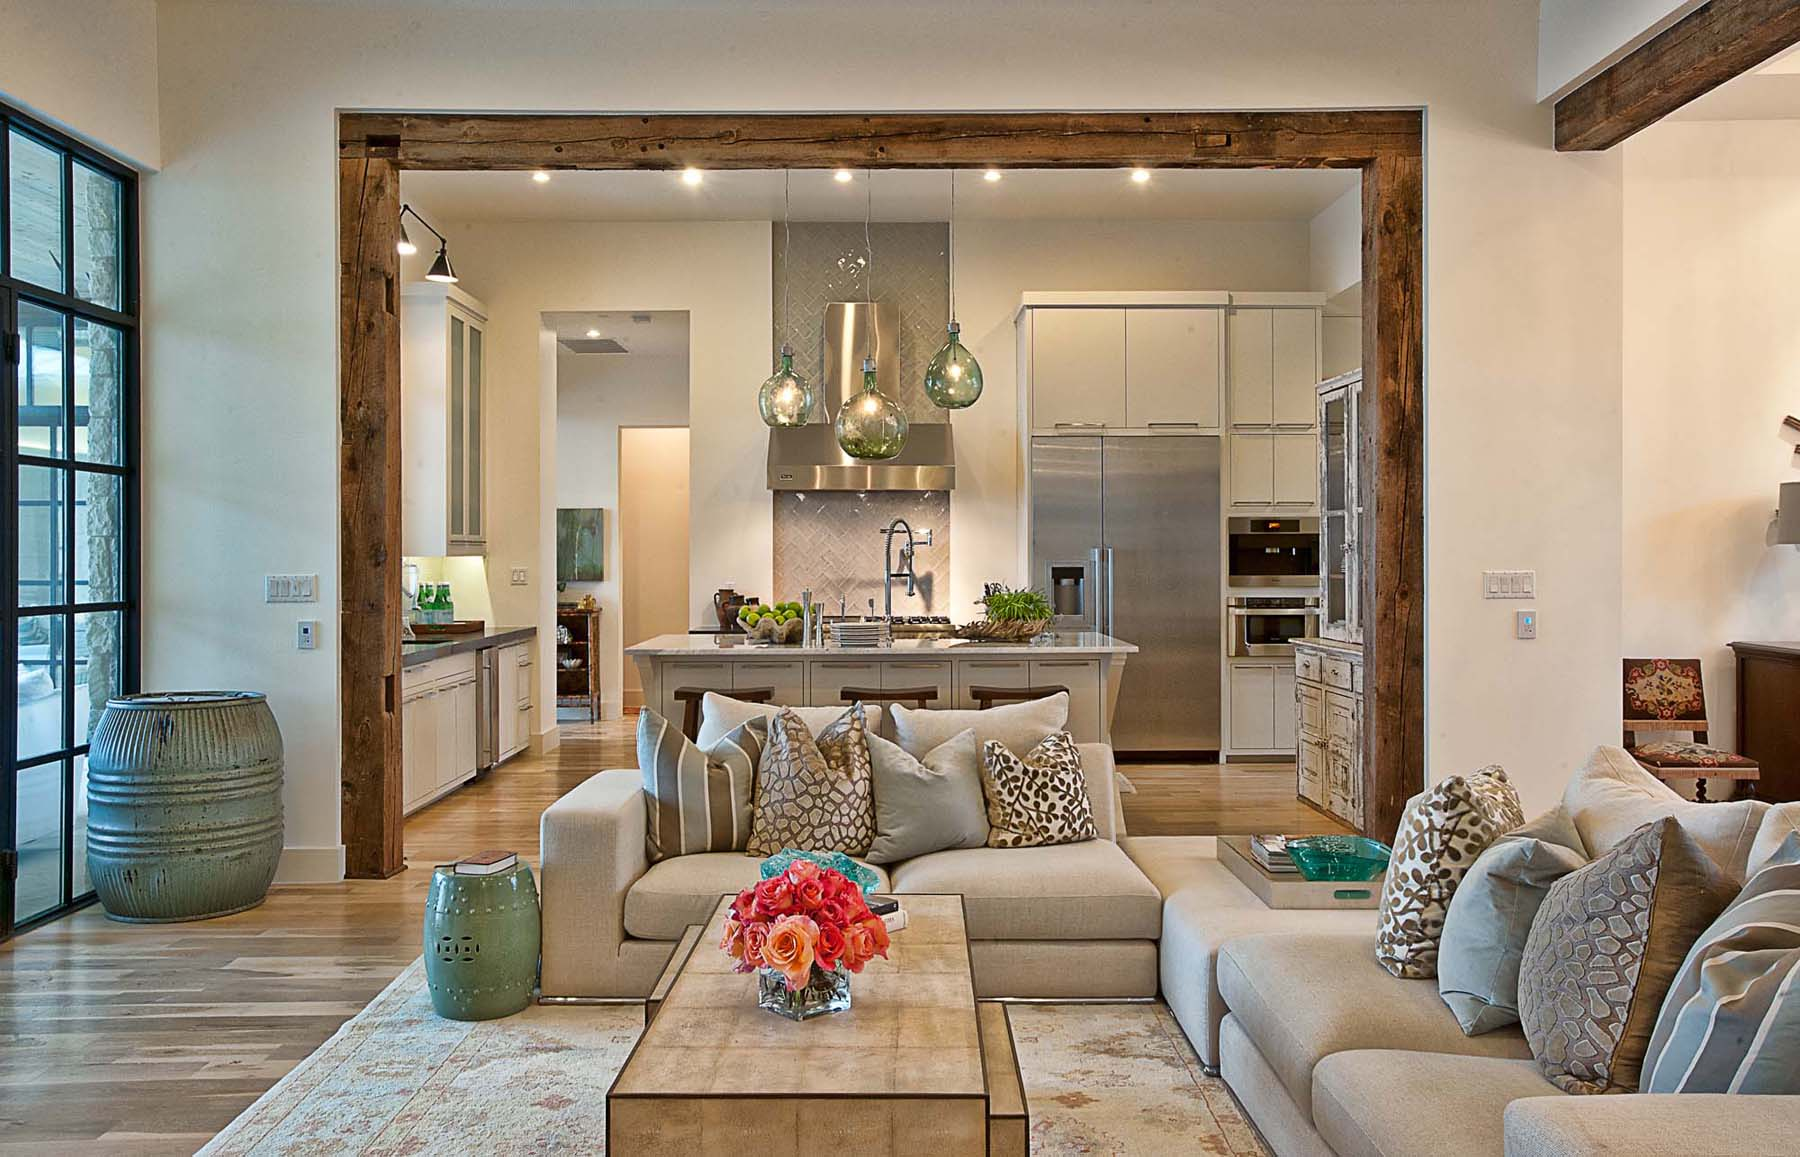

                                                BUSINESS PROBLEM
                                            
King County Realty is a newly established local business in Northwestern America.
The business owners and investors are seeking some concrete information regarding what attracts local buyers in this area to purchase new home to assist them with a marketing campaign to cater their services to the community. 
We will inspect the data set to determine what relationships and connections buyers have to purchasing a home to help King County Realty market their new business to suit.

What motivates buyers in this area to buy higher valued properties in King County? 

A linear regression model will be used to understand the connections to the business problem using the OSMIN Model - Obtain, Scrub, Explore, Model and interpret. 


In [38]:
#Import packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import random
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')

**OBTAIN** - Data has been sourced from kc_house_data.csv.

In [39]:
#Import data set and reviewed total of null values 
data = pd.read_csv('data\\kc_house_data.csv')
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**SCRUB** - During this stage, we'll focus on cleaning the data, obtaining critical statistical values and prepping for analysis.

In [40]:
#refined dataset and drop unnecessary column data
data.drop(['id', 'date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'yr_renovated'], axis=1, inplace=True)

In [41]:
#display first 5 rows
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,221900,3,1,1180,5650,1,3,7,1955,98178
1,538000,3,2.25,2570,7242,2,3,7,1951,98125
2,180000,2,1,770,10000,1,3,6,1933,98028
3,604000,4,3,1960,5000,1,5,7,1965,98136
4,510000,3,2,1680,8080,1,3,8,1987,98074


In [42]:
#Removed duplicates and show unique values for column data
data.drop_duplicates(inplace=True)
data.nunique()

price          3622
bedrooms         12
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
condition         5
grade            11
yr_built        116
zipcode          70
dtype: int64

In [43]:
#Observe correlations between variables to identify best predictor with regards to price
data.corr()

# I can see the strongest predictor of price is sqft_living with a 70% correlation - 
#with grade in close second at 67%, however sqft_lot makes more sense to view based on the market research that has been conducted in home sales.
#see: https://finance.zacks.com/property-size-increase-home-value-9809.html

#Objectivity here is to find other connections that are not so common - hence the sqft_living in relation to the price. I am not looking for causality - just a strong overview to determine what are uncommon connections that could help teh business effectively market with. 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
price,1,0.31,0.53,0.70,0.09,0.26,0.04,0.67,0.05,-0.05
bedrooms,0.31,1,0.51,0.58,0.03,0.18,0.03,0.36,0.16,-0.15
bathrooms,0.53,0.51,1,0.76,0.09,0.50,-0.13,0.67,0.51,-0.20
sqft_living,0.70,0.58,0.76,1,0.17,0.35,-0.06,0.76,0.32,-0.20
sqft_lot,0.09,0.03,0.09,0.17,1,-0.00,-0.01,0.11,0.05,-0.13
floors,0.26,0.18,0.50,0.35,-0.00,1,-0.26,0.46,0.49,-0.06
condition,0.04,0.03,-0.13,-0.06,-0.01,-0.26,1,-0.15,-0.36,0.00
grade,0.67,0.36,0.67,0.76,0.11,0.46,-0.15,1,0.45,-0.19
yr_built,0.05,0.16,0.51,0.32,0.05,0.49,-0.36,0.45,1,-0.35
zipcode,-0.05,-0.15,-0.20,-0.20,-0.13,-0.06,0.00,-0.19,-0.35,1


In [44]:
#Show current types, convert to integers as all numerical values, display data 
print(data.dtypes)
data = data.astype("int64", errors='ignore')
data.info()

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
condition        int64
grade            int64
yr_built         int64
zipcode          int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21589 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        21589 non-null  int64
 1   bedrooms     21589 non-null  int64
 2   bathrooms    21589 non-null  int64
 3   sqft_living  21589 non-null  int64
 4   sqft_lot     21589 non-null  int64
 5   floors       21589 non-null  int64
 6   condition    21589 non-null  int64
 7   grade        21589 non-null  int64
 8   yr_built     21589 non-null  int64
 9   zipcode      21589 non-null  int64
dtypes: int64(10)
memory usage: 1.8 MB


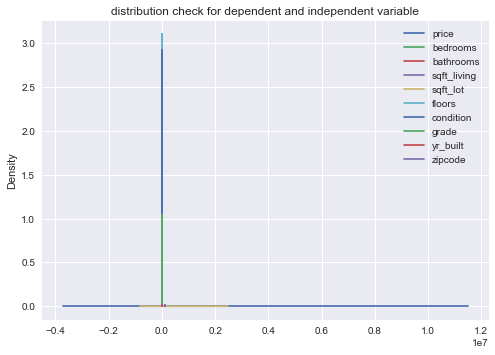

In [45]:
#kernal density plot estimation and distro check
data.plot.kde()
plt.title("distribution check for dependent and independent variable")
plt.show()

In [46]:
data_preds = data.drop('price', axis=1)
data_target = data['price']
data_preds.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,3,1,1180,5650,1,3,7,1955,98178
1,3,2,2570,7242,2,3,7,1951,98125
2,2,1,770,10000,1,3,6,1933,98028
3,4,3,1960,5000,1,5,7,1965,98136
4,3,2,1680,8080,1,3,8,1987,98074


In [47]:
#use sm,add_constant() to add constant term/y-intercept
predictors = sm.add_constant(data_preds)
predictors
#optimise betas adding another predictor intercept term = bo x const

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,1,3,1,1180,5650,1,3,7,1955,98178
1,1,3,2,2570,7242,2,3,7,1951,98125
2,1,2,1,770,10000,1,3,6,1933,98028
3,1,4,3,1960,5000,1,5,7,1965,98136
4,1,3,2,1680,8080,1,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...
21592,1,3,2,1530,1131,3,3,8,2009,98103
21593,1,4,2,2310,5813,2,3,8,2014,98146
21594,1,2,0,1020,1350,2,3,7,2009,98144
21595,1,3,2,1600,2388,2,3,8,2004,98027


In [48]:
model = sm.OLS(data_target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     3908.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:26:52   Log-Likelihood:            -2.9684e+05
No. Observations:               21589   AIC:                         5.937e+05
Df Residuals:                   21579   BIC:                         5.938e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.399e+05   3.17e+06      0.297      0.767   -5.27e+06    7.15e+06
bedrooms    -4.767e+04   2105.076    -22.643      0.000   -5.18e+04   -4.35e+04
bathrooms    5.724e+04   3222.411     17.762      0.000    5.09e+04    6.36e+04
sqft_living   187.5490      3.317     56.550      0.000     181.048     194.050
sqft_lot       -0.2426      0.038     -6.333      0.000      -0.318      -0.168
floors       1.912e+04   3758.277      5.088      0.000    1.18e+04    2.65e+04
condition    2.176e+04   2591.018      8.399      0.000    1.67e+04    2.68e+04
grade        1.318e+05   2230.152     59.088      0.000    1.27e+05    1.36e+05
yr_built    -3913.2186     74.269    -52.690      0.000   -4058.791   -3767.646
zipcode        59.9158     31.742      1.888      0.059      -2.301     122.133
==============================================================================
Omnibus:                    17145.336   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1176193.052
Skew:                           3.312   Prob(JB):                         0.00
Kurtosis:                      38.548   Cond. No.                     2.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#R squared value is at 0.620, P-values are at 0.00,  we will continue to review the data. Time to transform via scale and sort via z-score

In [50]:
data_preds_scaled = (data_preds - np.mean(data_preds)) /np.std(data_preds)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)

In [51]:
data_preds_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,21589,21589,21589,21589,21589,21589,21589,21589,21589
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.56,-2.38,-1.86,-0.35,-0.81,-3.70,-3.97,-2.42,-1.44
25%,-0.40,-1.02,-0.71,-0.24,-0.81,-0.63,-0.56,-0.68,-0.84
50%,-0.40,0.34,-0.19,-0.18,-0.81,-0.63,-0.56,0.14,-0.24
75%,0.68,0.34,0.51,-0.11,1.01,0.91,0.29,0.89,0.75
max,31.98,8.51,12.48,39.51,2.82,2.44,4.55,1.50,2.26


In [52]:
predictors = sm.add_constant(data_preds_scaled)
model = sm.OLS(data_target, predictors).fit()
model.summary()

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     3908.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:26:52   Log-Likelihood:            -2.9684e+05
No. Observations:               21589   AIC:                         5.937e+05
Df Residuals:                   21579   BIC:                         5.938e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.403e+05   1542.278    350.331      0.000    5.37e+05    5.43e+05
bedrooms    -4.415e+04   1949.950    -22.643      0.000    -4.8e+04   -4.03e+04
bathrooms    4.202e+04   2365.616     17.762      0.000    3.74e+04    4.67e+04
sqft_living  1.722e+05   3045.243     56.550      0.000    1.66e+05    1.78e+05
sqft_lot    -1.005e+04   1586.642     -6.333      0.000   -1.32e+04   -6938.957
floors       1.055e+04   2072.568      5.088      0.000    6483.729    1.46e+04
condition    1.416e+04   1685.708      8.399      0.000    1.09e+04    1.75e+04
grade        1.546e+05   2616.500     59.088      0.000    1.49e+05     1.6e+05
yr_built    -1.149e+05   2181.302    -52.690      0.000   -1.19e+05   -1.11e+05
zipcode      3206.4537   1698.709      1.888      0.059    -123.142    6536.050
==============================================================================
Omnibus:                    17145.336   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1176193.052
Skew:                           3.312   Prob(JB):                         0.00
Kurtosis:                      38.548   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#No difference to R value however some of the coefficients

In [54]:
#Transforming dataset 
ss = StandardScaler()
ss.fit(data_preds)
data_preds_st_scaled = ss.transform(data_preds_scaled)

In [55]:
#boolean value declared
np.allclose(data_preds_st_scaled, data_preds_scaled)

False

In [56]:
#preview the predicted df
data_preds_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,-0.40,-1.02,-0.98,-0.23,-0.81,-0.63,-0.56,-0.54,1.87
1,-0.40,0.34,0.53,-0.19,1.01,-0.63,-0.56,-0.68,0.88
2,-1.48,-1.02,-1.43,-0.12,-0.81,-0.63,-1.41,-1.29,-0.93
3,0.68,1.70,-0.13,-0.24,-0.81,2.44,-0.56,-0.20,1.08
4,-0.40,0.34,-0.44,-0.17,-0.81,-0.63,0.29,0.55,-0.07


In [57]:
#obtaining statistic values of target mean
data_target.mean()

540308.3467506601

In [58]:
#created array 
data_preds_st_scaled[:5, :]

array([[-4.07659475e+00, -3.77761637e+00, -2.26681084e+00,
        -3.64669502e-01, -4.08705556e+00, -6.20970663e+00,
        -7.00463484e+00, -6.71268218e+01, -1.83264888e+03],
       [-4.07659475e+00, -1.92206283e+00, -2.26516216e+00,
        -3.64668574e-01, -7.98842164e-01, -6.20970663e+00,
        -7.00463484e+00, -6.71314589e+01, -1.83266739e+03],
       [-5.24203145e+00, -3.77761637e+00, -2.26729714e+00,
        -3.64666966e-01, -4.08705556e+00, -6.20970663e+00,
        -7.73112125e+00, -6.71523258e+01, -1.83270126e+03],
       [-2.91115806e+00, -6.65093003e-02, -2.26588568e+00,
        -3.64669881e-01, -4.08705556e+00, -1.48465996e+00,
        -7.00463484e+00, -6.71152292e+01, -1.83266355e+03],
       [-4.07659475e+00, -1.92206283e+00, -2.26621779e+00,
        -3.64668085e-01, -4.08705556e+00, -6.20970663e+00,
        -6.27814842e+00, -6.70897252e+01, -1.83268520e+03]])

In [59]:
#confirm lr to run
lr = LinearRegression()
lr.fit(data_preds_st_scaled, data_target)

LinearRegression()

In [60]:
#setting co-efficient array 
lr.coef_

array([-4.08991298e+04,  3.08463823e+04,  1.58122472e+08, -4.16211715e+08,
        5.81584102e+03,  9.21168745e+03,  1.81385689e+05, -3.37559214e+06,
        1.71596651e+05])

In [61]:
#calculating intercept data value 
lr.intercept_

296151978.4850304

In [62]:
#calculating linear regression score 
lr.score(data_preds_st_scaled, data_target)

0.6197829380613668

In [63]:
#validating though y^test
y_hat = lr.predict(data_preds_st_scaled)
y_hat

array([313016.52447158, 662161.5086115 , 228060.61663187, ...,
        80252.96640611, 399918.59277272,  84232.66216922])

In [64]:
#find values for  array 
data_preds_st_scaled.shape

(21589, 9)

In [65]:
#staged array
base_pred = np.zeros(9).reshape(1, -1)
base_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [66]:
#predicted array
lr.predict(base_pred)

array([2.96151978e+08])

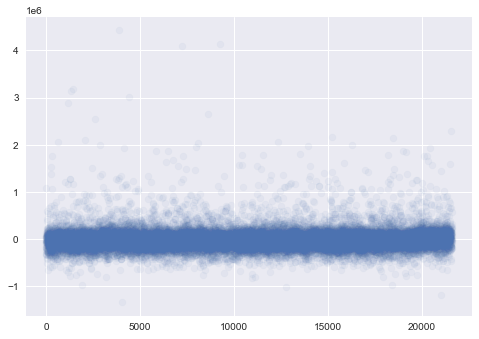

In [67]:
#Review y hat residual
y_hat = lr.predict(data_preds_st_scaled)
resid = (data_target - y_hat)

plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.05)

In [68]:
#patterns in the errors are spotted near the 0.00, with some few faint outliers cast in the 2, 3, 4, and some in negative value range aswell. 

In [69]:
#overall metrics predicted data target metric to be .619 or 62%
metrics.r2_score(data_target, lr.predict(data_preds_st_scaled))

0.6197829380613668

In [70]:
#confirming through equation np mean r2 target score is 0
avg_quality = np.mean(data_target)
num = len(data_target)
metrics.r2_score(data_target, avg_quality * np.ones(num))

0.0

In [71]:
#Statistical measure calculating predicators
metrics.mean_absolute_error(data_target, lr.predict(data_preds_st_scaled))

144764.04226654395

In [72]:
#extremely high value of being off on the sqft_living data 
metrics.mean_squared_error(data_target, lr.predict(data_preds_st_scaled), squared=False)

226557.46000060465

In [73]:
# Take a sample of 50 records to test if the hypothesis related to the sqt_lot should be investigated
sample = data.sample(n=50, random_state=22)
# Calculate the sample mean
sample_mean = sample.sqft_lot.mean()
sample_mean
#Sqft_lots in this area appear to be very large at 9925.96 - lets review for outliers after we ruin this sample (out of curiosity)

9925.96

In [76]:
# Find the difference between the sample and population means
err = np.abs(sample_mean - population_mean)
# Divide by the population mean to find a percent error
per_err = err / population_mean
per_err

NameError: name 'population_mean' is not defined

In [74]:
#Create sample test
five_sample_means = []
for i in range(5):
    sample = data.sample(n=50, random_state=i+100)
    five_sample_means.append(sample.sqft_lot.mean())
    
five_sample_means

[8854.38, 14481.8, 10178.66, 11351.08, 8747.14]

In [75]:
#Create sample mean
five_sample_errors = [np.abs(sample_mean-population_mean)/population_mean for sample_mean in five_sample_means]
five_sample_errors

NameError: name 'population_mean' is not defined

In [ ]:
#VisuaLise the 
x_labels = [f"Sample {x}" for x in range(1, 6)]

fig, ax = plt.subplots(figsize=(7,6))

ax.bar(x_labels, five_sample_means)
ax.set_ylabel("Sqft_lot Mean")
ax.axhline(y=population_mean, color="red", linewidth=5, linestyle="--")
ax.legend(
    handles=[Line2D([0],[0], color="red", linestyle="--")],
    labels=["True Population Mean"],
    fontsize="medium"
);
#Interesting fact that the population mean roughly displays the mean at 2000 across all samples for Sqft_lot (Recall the sqft_lot was determined at 15103 (see line 9 of this notebook))

In [ ]:
#View head of the lamba function to remove exponential values - Scrub
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
data.describe()

In [ ]:
#Creating the p-value and the z-score
import math
import scipy.stats as stats
mu = 150
sigma = 100
n=21
x_bar = 151
z = (x_bar - mu)/(sigma/math.sqrt(n))
p = 1 - stats.norm.cdf(z)

p,z

# (p = 0.48, z = 0.045)

                                            **  HYPOTHESIS **

Below we set to explore the data set by deriving statistics and creating visualisation with dummy test data.

Null hypothesis:
There is no difference between experimental and control group - when comparing sqft_lot against sqft_living does NOT affect a buyers decision to purchase a home. 
𝜇1=𝜇2μ1=μ2

Alternative Hypothesis:
There is a difference between experimental and control group - the sqft_living DOES affect a buyers decision when purchasing a home. 
𝜇1≠𝜇2μ1≠μ2


#alpha value is 0.35 

In [ ]:
#running z test visualision to determine area above z stat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,0.45,0.01),
                 y1= stats.norm.pdf(np.arange(-4,0.45,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(0.45,4,0.01), 
                 y1= stats.norm.pdf(np.arange(0.45,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 0.45');

In [ ]:
#show norm with degree of freedom
stats.norm.cdf(z)

In [ ]:
#P value minus degree of freedom 
pval = 1 - stats.norm.cdf(z)
pval

In [ ]:
# creating boxplots to see the outliers in the price variable 

plt.figure(figsize=(6,4))
sns.boxplot(y=data['sqft_living']).set_title
plt.show()

In [ ]:
#let us numerically draw conclusions
#creating function that can calculate interquartile range of the data
def calc_interquartile(data, column):
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(data[column], 25), np.percentile(data[column], 75)
    #calculate the inter quartile range
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally used as a threshold)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = data[data[column] > upper]
    lower_outliers = data[data[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])

In [ ]:
#applying the above function on columns to find the total outliers in every feature
for i in data.columns:
    print('Total outliers in ', i)
    calc_interquartile(data, i)
    print()

In [ ]:
""" creating function for calculating zscore which is subtracting the mean from every data point and dividing by the standard deviation and if the zscore value of any data point 
is less than -3 or greater than 3, then to determine if it is an outlier"""

def z_score(data, column):
    #creating global variables for plotting the graph for better demonstration
    global zscore, outlier
    #creating lists to store zscore and outliers 
    zscore = []
    outlier =[]
    # for zscore generally taken thresholds are 2.5, 3 or 3.5 - used 3 here 
    threshold = 3
    # calculating the mean of the passed column
    mean = np.mean(data[column])
    # calculating the standard deviation of the passed column
    std = np.std(data[column])
    for i in data[column]:
        z = (i-mean)/std
        zscore.append(z)
        #if the zscore is greater than threshold = 3 that means it is an outlier
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

In [ ]:
#plotting outliers graph for 'price' feature 
z_score(data, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [ ]:
#remove the outliers from price using zscore
dj=[]
for i in data.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
data['P'] = dj

x = data.drop(data[data['P'] == 0.0].index) 
x.shape

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(x['price'], kde=False)
plt.show()

In [ ]:
#Plotted KDE - Explore
for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [ ]:
#Plotted KDE - Explore
for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [ ]:
# import libraries for OLS - Obtain 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula - Explore 
f = 'price~grade'
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()
#Display OLS Summary - Explore 
model.summary()

In [ ]:
# import libraries for OLS - Obtain 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula - Explore 
f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()
#Display OLS Summary - Explore 
model.summary()

Note that the R squared value is between 0  and 1 with a value of 0.493. This is a great sign that the "sqft_lot" coefficient has a strong relationship to sale price aswell as the sqft_lot R squared testing above. This info will add value to further research regarding understanding the relationships connecting Kings County homebuyers' requirements of buying a property. 

In [ ]:
#visualisation 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [ ]:
#graphical representation stipulating residual data 
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Above we can see a start to a regression line andt starts to skew off to the left, stating that the residuals are not in alignment with teh regression testing that we are performing - which means that the model accurately depicts regression to a point and then spikes. 

Explore: the data set by deriving statistics and creating visualisation with dummy test data after testing hypothesis. 

In [ ]:
#Paired sample test with null hypo value

data = pd.read_csv('data\\kc_house_data.csv')
data[['price','sqft_living', 'sqft_lot']].describe()
ttest,pval = stats.ttest_rel(data['price'], data['sqft_living'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

                                    **  ALTERNATIVE HYPOTHESIS CONFIRMED  ** 

Below we set to explore the data set by deriving statistics and creating visualisation with dummy test data.

Null hypothesis:
There is no difference between experimental and control group - when comparing sqft_lot against sqft_living does NOT affect a buyers decision to purchase a home. 
𝜇1=𝜇2μ1=μ2

Alternative Hypothesis:
There is a difference between experimental and control group - the sqft_living and sqft_Lot DOES affect a buyers decision when purchasing a home by 

𝜇1≠𝜇2μ1≠μ2
#alpha value is 0.35

In [ ]:
#setting predictors location  
data_pred = data.iloc[:,0:12]
data_pred.head()

In [ ]:
#visualse value of correlation percentage 
data_pred.corr()

In [ ]:
#check for connections 
abs(data_pred.corr()) >= 0.70

In [ ]:
#Compare linearity between 2 variables for further analysis
sns.set_theme(color_codes=True)
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
data = pd.read_csv('data\\kc_house_data.csv')
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='grade',y='price',data=data,palette='Set1',ax=ax)
ax.set_title('Scatter plot of grade vs price')

ax = f.add_subplot(122)
sns.scatterplot(x='sqft_living',y='price',data=data,palette='viridis')
ax.set_title('Scatter plot of sqft_living vs price')
plt.savefig('sc.png');

In [ ]:
#Cleaning data for prediction
data=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# combine the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
data['pairs'] = list(zip(data.level_0, data.level_1))
# set index to pairs
data.set_index(['pairs'], inplace = True)
#drop level columns
data.drop(columns=['level_1', 'level_0'], inplace = True)
# renamed correlation column to cc 
data.columns = ['cc']
# drop duplicates. 
data.drop_duplicates(inplace=True)

In [ ]:
#quick preview to confirm 
data[(data.cc>=.70) & (data.cc <1)]

In [ ]:
#creating a heatmap to learn even more 
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

Each square shows the correlation between the variables on each axis. Correlation ranges from -2 to +1. Data closer to zero means there is no linear relationship between the two variables.

3 important parameter estimates or statistics.
1. Sqft_living : R value square through independant OLS = 0.493

2. Sqft_lot: Common knowledge/speculation based on market reasearch indicates that the lot size of a house directly effects the cost of house sales greater than a living area size - however this theory proved incorrect based on the data set for this area. Based on data the true population mean for the sqft_living area was 2000 feet squared.     

3. Overall Linear Regression score calculated to be 0.6197829380613668 
